In [2]:
!pip install --user seaborn

In [3]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [7]:
#Read the Data
df =pd.read_csv(r"C:\Project portfolio\Movie Recommendation System\movies.csv")


In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
#missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [10]:
#data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#convert budget type float into int
df['budget'].round().astype('Int64')
df['budget']=df['budget'].astype('Int64')

In [8]:
df['gross']=df['gross'].astype('Int64')

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [12]:
# create correct year
df['yearcorrect'] = df['released'].astype(str).str.split().str[2]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [14]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [15]:
pd.set_option('display.max_rows',None)

In [18]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [19]:
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [20]:
df['gross'].dtypes   

dtype('float64')

In [21]:
#replacing the NaN values with 0
df['budget']=pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['gross']=pd.to_numeric(df['gross'], errors='coerce').fillna(0)

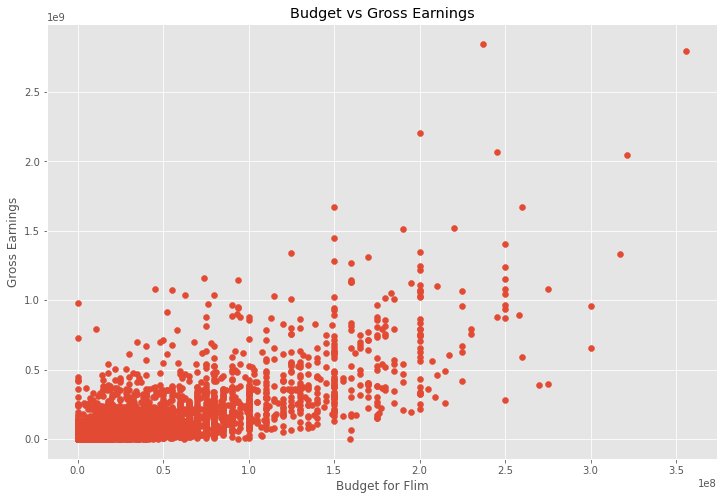

In [22]:
#Scatter plot with Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Flim')
plt.ylabel('Gross Earnings')
plt.show()

In [23]:
df['budget'] = (df['budget']).astype(int)
df['gross'] = (df['gross']).astype(int)

In [24]:
#there are 3 negative gross, so remove that
df = df[df['gross'] >= 0]

<AxesSubplot:xlabel='budget', ylabel='gross'>

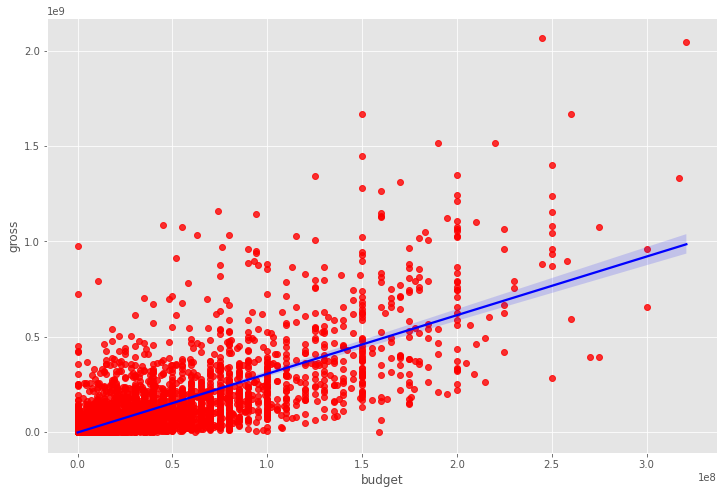

In [25]:
# Plot budget vs gross earning using Seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [26]:
#Looking for correlation

In [27]:
df.corr(method='pearson') # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097531,0.223016,0.309558,0.270321,0.120226
score,0.097531,1.000000,0.408423,0.051897,0.185356,0.398355
votes,0.223016,0.408423,1.000000,0.480264,0.632706,0.303399
budget,0.309558,0.051897,0.480264,1.000000,0.754442,0.263135
gross,0.270321,0.185356,0.632706,0.754442,1.000000,0.234342
runtime,0.120226,0.398355,0.303399,0.263135,0.234342,1.000000


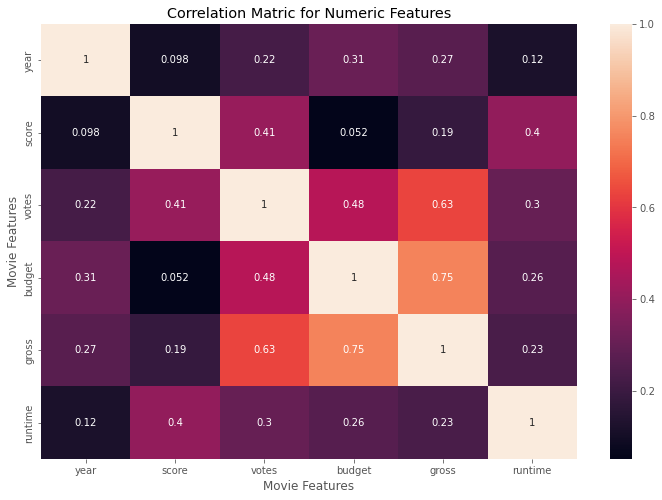

In [28]:
#High Correlation Between Budget and Gross
correlation_matrix= df.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [31]:
#column name is numerized 
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6585,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2
1,5571,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,2
2,5140,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2
4,1025,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,2


In [32]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6585,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2
1,5571,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,2
2,5140,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2
4,1025,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,2


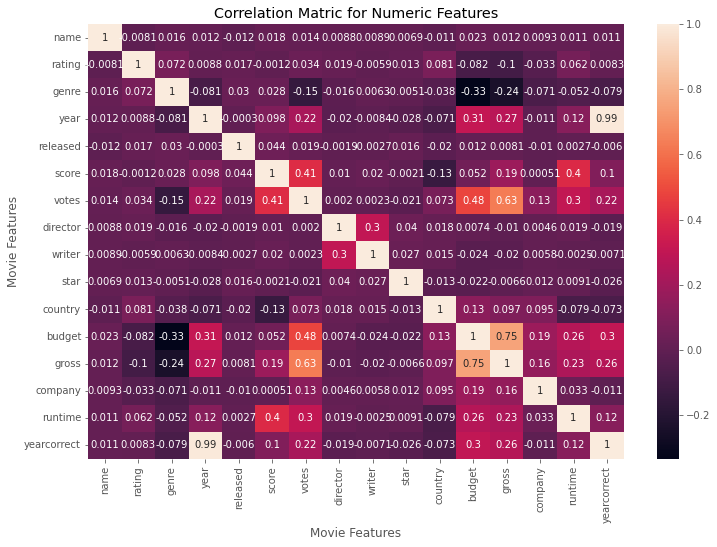

In [33]:
correlation_matrix= df.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [34]:
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008097,0.015695,0.011998,-0.011619,0.017532,0.014193,0.008773,0.008856,0.006855,-0.010654,0.022615,0.011607,0.009270,0.010893,0.010607
rating,-0.008097,1.000000,0.072419,0.008810,0.016569,-0.001245,0.033693,0.019453,-0.005949,0.013441,0.081266,-0.082350,-0.099655,-0.032913,0.062495,0.008260
genre,0.015695,0.072419,1.000000,-0.080848,0.029515,0.028432,-0.145083,-0.015562,0.006342,-0.005133,-0.037525,-0.334922,-0.241825,-0.070984,-0.052217,-0.078566
year,0.011998,0.008810,-0.080848,1.000000,-0.000302,0.097531,0.223016,-0.020433,-0.008377,-0.027581,-0.071078,0.309558,0.270321,-0.010564,0.120226,0.990059
released,-0.011619,0.016569,0.029515,-0.000302,1.000000,0.043620,0.018848,-0.001906,-0.002744,0.016169,-0.020231,0.012267,0.008136,-0.010118,0.002668,-0.006031
score,0.017532,-0.001245,0.028432,0.097531,0.043620,1.000000,0.408423,0.010156,0.019900,-0.002150,-0.133713,0.051897,0.185356,0.000514,0.398355,0.102884
votes,0.014193,0.033693,-0.145083,0.223016,0.018848,0.408423,1.000000,0.001989,0.002316,-0.021207,0.073118,0.480264,0.632706,0.132037,0.303399,0.218554
director,0.008773,0.019453,-0.015562,-0.020433,-0.001906,0.010156,0.001989,1.000000,0.298868,0.039536,0.017633,0.007360,-0.010348,0.004590,0.018926,-0.019338
writer,0.008856,-0.005949,0.006342,-0.008377,-0.002744,0.019900,0.002316,0.298868,1.000000,0.027481,0.015458,-0.024274,-0.019872,0.005809,-0.002514,-0.007128
star,0.006855,0.013441,-0.005133,-0.027581,0.016169,-0.002150,-0.021207,0.039536,0.027481,1.000000,-0.013138,-0.022238,-0.006581,0.012201,0.009089,-0.025561


In [35]:
correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008097
      genre       0.015695
      year        0.011998
      released   -0.011619
dtype: float64

In [36]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.334922
budget  genre    -0.334922
genre   gross    -0.241825
gross   genre    -0.241825
votes   genre    -0.145083
dtype: float64

In [37]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr.head()

gross   votes          0.632706
votes   gross          0.632706
budget  gross          0.754442
gross   budget         0.754442
year    yearcorrect    0.990059
dtype: float64

# Votes and Budget have highest correlation to gross earnings

# Company has low correlation